In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-alphabet-images/test_alphabet_images/image_46469.png
/kaggle/input/test-alphabet-images/test_alphabet_images/image_341.png
/kaggle/input/test-alphabet-images/test_alphabet_images/image_120371.png
/kaggle/input/test-alphabet-images/test_alphabet_images/image_120372.png
/kaggle/input/test-alphabet-images/test_alphabet_images/image_120373.png
/kaggle/input/test-alphabet-images/test_alphabet_images/image_46468.png
/kaggle/input/test-alphabet-images/test_alphabet_images/image_46470.png
/kaggle/input/test-alphabet-images/test_alphabet_images/image_340.png
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import pickle
import cv2

Importing Dataset

In [3]:
data = pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')

In [4]:

data.shape

(372450, 785)

In [5]:
data.columns = ['label'] + [f'pixel_{i}' for i in range(784)]

In [6]:

Y = data.label
X = data.drop('label', axis=1)

In [7]:
Y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [8]:
letters = [chr(i)  for  i in range(65,91) ]
letters

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

# Creating train and test set

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [10]:
X_train.shape,X_test.shape

((297960, 28, 28, 1), (74490, 28, 28, 1))

# Creating the Model

In [11]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(26, activation='softmax'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,218 (258.66 KB)

 Trainable params: 66,218 (258.66 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 146s 15ms/step - accuracy: 0.8481 - loss: 0.7053 - val_accuracy: 0.9751 - val_loss: 0.0867
Epoch 2/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 142s 15ms/step - accuracy: 0.9632 - loss: 0.1263 - val_accuracy: 0.9798 - val_loss: 0.0724
Epoch 3/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 139s 15ms/step - accuracy: 0.9705 - loss: 0.1024 - val_accuracy: 0.9824 - val_loss: 0.0649
Epoch 4/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 139s 15ms/step - accuracy: 0.9729 - loss: 0.0928 - val_accuracy: 0.9810 - val_loss: 0.0693
Epoch 5/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 138s 15ms/step - accuracy: 0.9744 - loss: 0.0886 - val_accuracy: 0.9841 - val_loss: 0.0602


In [14]:
pickle.dump(model,open('alphabel_recogonizer.pkl','wb'))

# Printing Classification Report

In [15]:
y_pred = model.predict(X_test)
print(classification_report(np.argmax(y_pred,axis=1),y_test))

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2799
           1       0.98      0.98      0.98      1686
           2       0.99      0.99      0.99      4745
           3       0.97      0.93      0.95      2141
           4       0.97      0.99      0.98      2171
           5       0.96      0.99      0.98       224
           6       0.93      0.99      0.96      1114
           7       0.95      0.97      0.96      1429
           8       0.95      0.99      0.97       226
           9       0.96      0.98      0.97      1631
          10       0.94      0.99      0.97      1080
          11       0.98      0.98      0.98      2328
          12       0.99      0.98      0.99      2510
          13       0.99      0.98      0.98      3796
          14       0.99      0.99      0.99     11570
          15       0.99      0.99      0.99      3849
          16       0.98      0.94    

# Visualizing the test results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


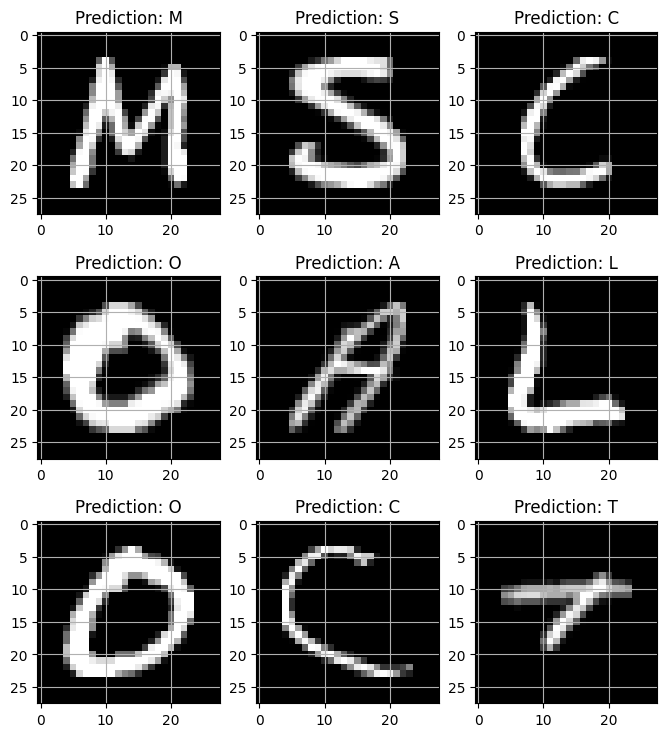

In [16]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i, ax in enumerate(axes):
    img = X_test[i].reshape(28, 28)  # Reshape to (28, 28) for imshow
    ax.imshow(img, cmap="gray")
    
    # Assuming `letters` is your class labels or something similar
    pred = letters[np.argmax(model.predict(np.expand_dims(X_test[i], 0)), axis=1)[0]]
    ax.set_title("Prediction: " + pred)
    ax.grid()

# Checking the model with external images

In [19]:
test_image_loaded = tf.keras.utils.load_img('/kaggle/input/alphabet-images/test_alphabet_images/image_348292.png' ,color_mode='grayscale')

In [20]:
test_image = np.array(test_image_loaded)
test_image.shape

(106, 93)

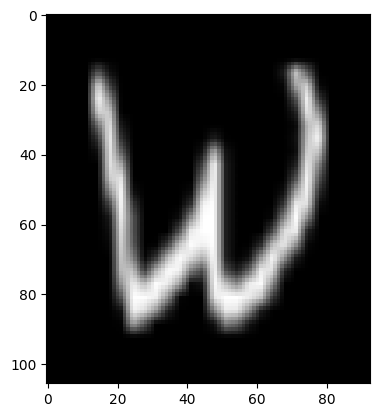

In [21]:
plt.imshow(test_image,'gray')

In [25]:
test_image =cv2.resize(test_image,(28,28))
test_image = np.expand_dims(test_image, -1)
test_image = np.expand_dims(test_image, axis=0) 
test_image.shape

(1, 28, 28, 1)

In [26]:
letters[np.argmax(model.predict(test_image),axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


'W'